## Importing Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Use variable path to import most recent dataframe
path = r'/Users/rose/Documents/Career Foundry/Instacart Basket Analysis'

In [3]:
# Import version of dataframe with exclusion: instacart_cust_profile_high_activity.pkl from 4.10 Part 1 notebook as
instacart_for_cfo = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_cust_profile_high_activity.pkl'))

The instacart_for_cfo dataframe excludes low activity records that the CFO has no interest in.

In [4]:
instacart_for_cfo.shape

(29270938, 35)

In [5]:
instacart_for_cfo.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spend_flag', 'order_frequency', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status',
       'income', '_merge', 'region', 'activity_flag', 'age_group',
       'income_group'],
      dtype='object')

In [6]:
# Drop _merge column
instacart_for_cfo = instacart_for_cfo.drop(columns = ['_merge'])

In [7]:
# excludes low activity records that the CFO has no interest in.
instacart_for_cfo.shape

(29270938, 34)

In [9]:
# Import version of dataframe without exclusion: instacart_cust_profile_all_activity.pkl from 4.10 Part 1 notebook as
instacart_all_activity = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_cust_profile_all_activity.pkl'))

The instacart_all_activity dataframe includes both high and low activity, w/ exclusions.

In [10]:
instacart_all_activity.shape

(30629741, 33)

## Visualization for CFO

### Customer Profile

In [11]:
instacart_for_cfo['age_group'].value_counts()

age_group
Adult          13778563
Senior          9998947
Young Adult     3650672
Youth           1842756
Name: count, dtype: int64

<Axes: xlabel='age_group'>

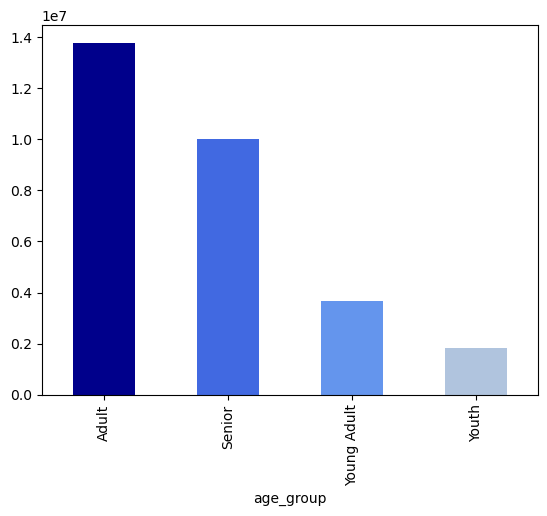

In [12]:
# by Age_group
instacart_for_cfo['age_group'].value_counts().plot.bar(color = ['darkblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'])

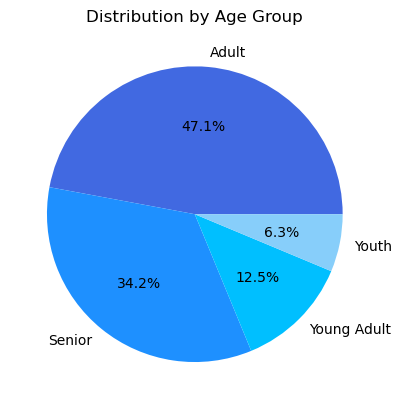

In [13]:
# By age group
age_group_counts = instacart_for_cfo['age_group'].value_counts()

# Plotting as a pie chart
age_group_counts = age_group_counts.plot.pie(colors=['royalblue', 'dodgerblue', 'deepskyblue', 'lightskyblue'], autopct='%1.1f%%')
plt.ylabel('')  # Remove the ylabel for cleaner presentation
plt.title('Distribution by Age Group')
plt.show()

In [14]:
instacart_for_cfo['fam_status'].value_counts()

fam_status
married                             20553278
single                               4801897
divorced/widowed                     2510623
living with parents and siblings     1405140
Name: count, dtype: int64

<Axes: xlabel='fam_status'>

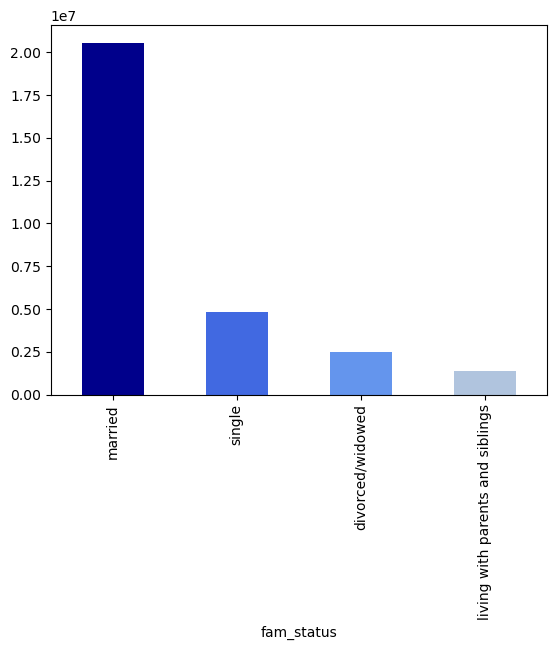

In [15]:
# by family status
instacart_for_cfo['fam_status'].value_counts().plot.bar(color = ['darkblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'])

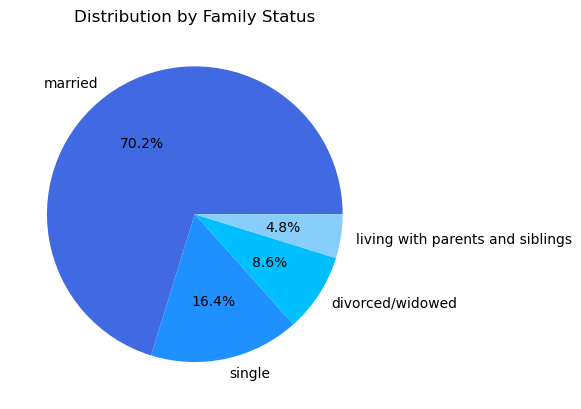

In [16]:
# By Family status
fam_counts = instacart_for_cfo['fam_status'].value_counts()

# Plotting as a pie chart
fam_status = fam_counts.plot.pie(colors=['royalblue', 'dodgerblue', 'deepskyblue', 'lightskyblue'], autopct='%1.1f%%')
plt.ylabel('')  # Remove the ylabel for cleaner presentation
plt.title('Distribution by Family Status')
plt.show()

In [17]:
fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_fam_status.png'))

In [18]:
# Frequency
instacart_for_cfo['income_group'].value_counts()

income_group
Middle    15119028
High       8676806
Low        5475104
Name: count, dtype: int64

<Axes: xlabel='income_group'>

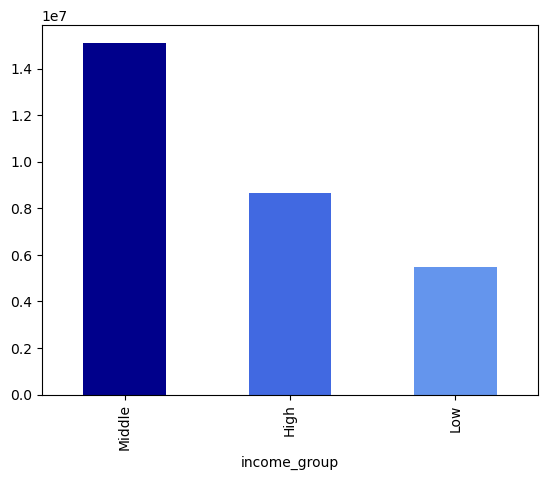

In [19]:
# By Income group
instacart_for_cfo['income_group'].value_counts().plot.bar(color = ['darkblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'])

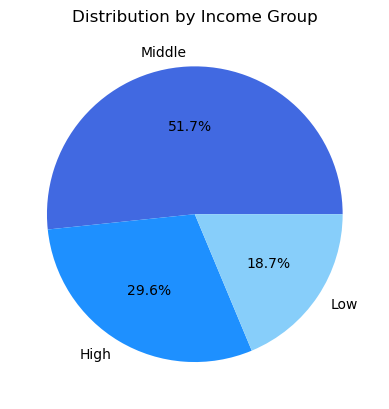

In [20]:
# By income group
income_group_counts = instacart_for_cfo['income_group'].value_counts()

# Plotting as a pie chart
income_group_counts = income_group_counts.plot.pie(colors=['royalblue', 'dodgerblue', 'lightskyblue'], autopct='%1.1f%%')
plt.ylabel('')  # Remove the ylabel for cleaner presentation
plt.title('Distribution by Income Group')
plt.show()

In [21]:
instacart_for_cfo['region'].value_counts()

region
South        9746930
West         7486109
Midwest      6859855
Northeast    5178044
Name: count, dtype: int64

<Axes: xlabel='region'>

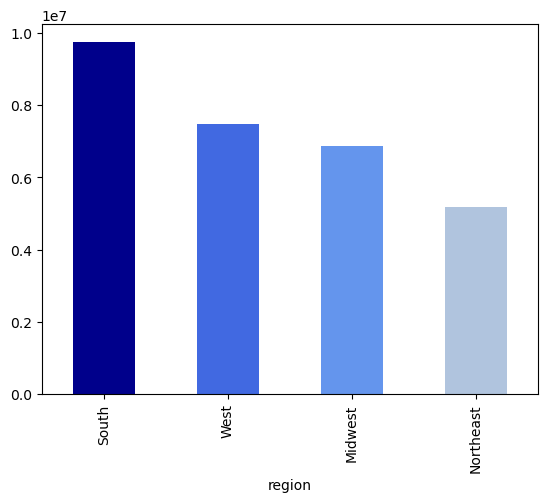

In [22]:
# by Region
instacart_for_cfo['region'].value_counts().plot.bar(color = ['darkblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'])

In [23]:
instacart_for_cfo['orders_day_of_week'].value_counts()

orders_day_of_week
0    5585707
1    5120353
6    4053682
5    3813720
2    3805426
3    3466482
4    3425568
Name: count, dtype: int64

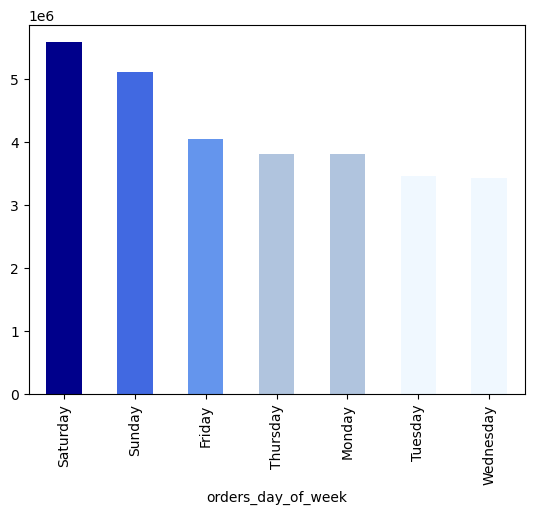

In [24]:
# by day of the week
bar_dow = instacart_for_cfo['orders_day_of_week'].value_counts().plot.bar(color=['darkblue', 'royalblue', 'cornflowerblue', 'lightsteelblue', 'lightsteelblue', 'aliceblue', 'aliceblue'])

# Set custom labels for the x-axis (assuming the weekdays as labels)
bar_dow.set_xticklabels(['Saturday', 'Sunday', 'Friday', 'Thursday', 'Monday', 'Tuesday', 'Wednesday'])

plt.show()


In [25]:
# Export chart
bar_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow.png'))

<Axes: ylabel='Frequency'>

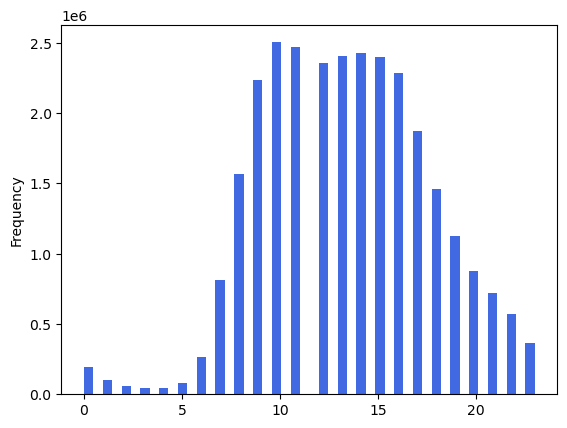

In [26]:
# by order_hour_of_day
instacart_for_cfo['order_hour_of_day'].plot.hist(bins = 48, color = ['royalblue'] )

In [27]:
instacart_for_cfo['department_id'].value_counts()

department_id
4     8586351
16    4892140
19    2616075
7     2430657
1     2006425
13    1683753
3     1059826
15     956832
20     948799
9      777804
17     660042
12     639068
14     632755
11     399661
18     387739
6      242099
5      137942
8       87853
21      61282
2       32275
10      31560
Name: count, dtype: int64

<Axes: xlabel='department_id'>

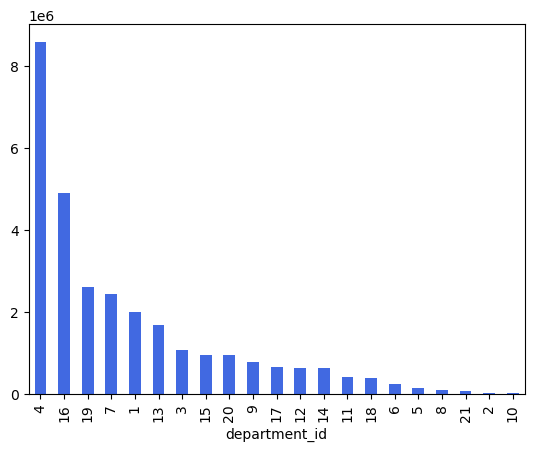

In [28]:
# by department_id  
instacart_for_cfo['department_id'].value_counts().plot.bar(color = ['royalblue'])

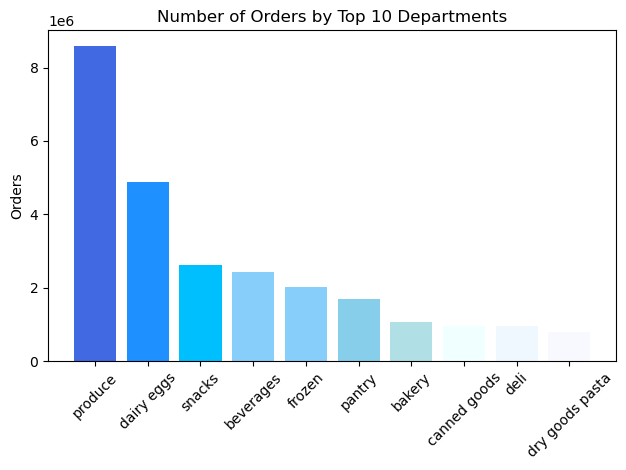

In [29]:
# create bar chart for department
fig, ax = plt.subplots()

department_name = ['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen', 'pantry', 'bakery', 'canned goods', 'deli', 'dry goods pasta']
counts = [8586351, 4892140, 2616075, 2430657, 2006425, 1683753, 1059826, 956832, 948799, 777804]

# Define colors for the bars
bar_colors = ['royalblue', 'dodgerblue', 'deepskyblue', 'lightskyblue', 'lightskyblue', 'skyblue', 'powderblue', 'azure', 'aliceblue', 'ghostwhite']

ax.bar(department_name, counts, color=bar_colors)

ax.set_ylabel('Orders')
ax.set_title('Number of Orders by Top 10 Departments')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [30]:
ax.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_top_dept.png'))

In [31]:
instacart_for_cfo['price_range_loc'].value_counts()

price_range_loc
Low Price Range     15910072
Mid Price Range     12983995
High Price Range      376871
Name: count, dtype: int64

<Axes: xlabel='price_range_loc'>

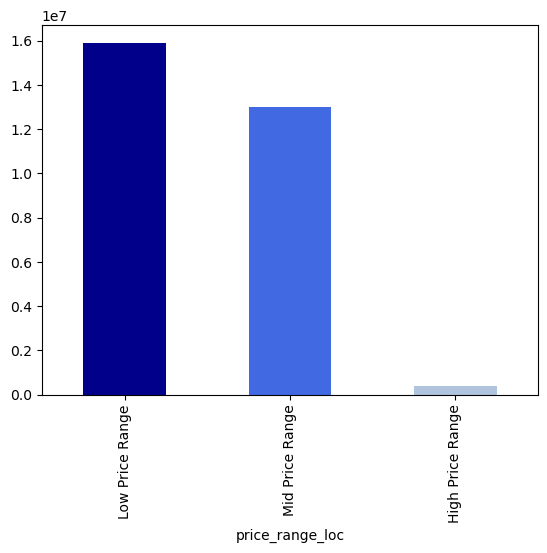

In [32]:
# by price_range_loc
instacart_for_cfo['price_range_loc'].value_counts().plot.bar(color = ['darkblue', 'royalblue', 'lightsteelblue'])

In [33]:
instacart_for_cfo['loyalty_flag'].value_counts()

loyalty_flag
Loyal customer      13410522
Regular customer    11317058
New customer         4543358
Name: count, dtype: int64

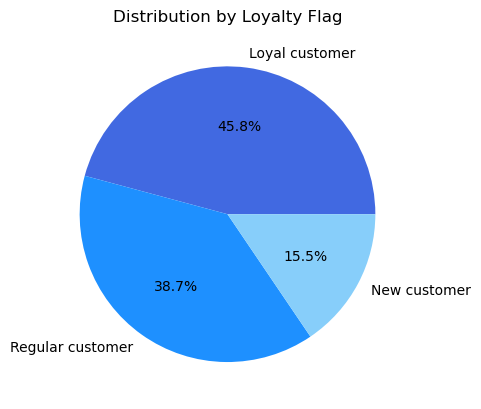

In [34]:
# By loyalty_flag
loyalty_flag_counts = instacart_for_cfo['loyalty_flag'].value_counts()

# Plotting as a pie chart
loyalty_flag_counts = loyalty_flag_counts.plot.pie(colors=['royalblue', 'dodgerblue', 'lightskyblue'], autopct='%1.1f%%')
plt.ylabel('')  # Remove the ylabel for cleaner presentation
plt.title('Distribution by Loyalty Flag')
plt.show()

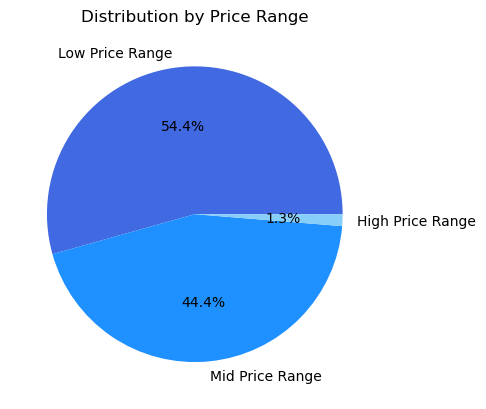

In [35]:
# By price_range_loc
price_range_loc_counts = instacart_for_cfo['price_range_loc'].value_counts()

# Plotting as a pie chart
price_range_loc_counts = price_range_loc_counts.plot.pie(colors=['royalblue', 'dodgerblue', 'lightskyblue'], autopct='%1.1f%%')
plt.ylabel('')  # Remove the ylabel for cleaner presentation
plt.title('Distribution by Price Range')
plt.show()

## Bar Chart, for customer loyalty, 2 ways

In [36]:
# groupby loyalty_flag and order_id 
instacart_ccust_loyal = instacart_for_cfo.groupby('loyalty_flag')['order_id'].nunique().reset_index(drop=False)

###### instacart_ccust_loyal

<Axes: xlabel='loyalty_flag'>

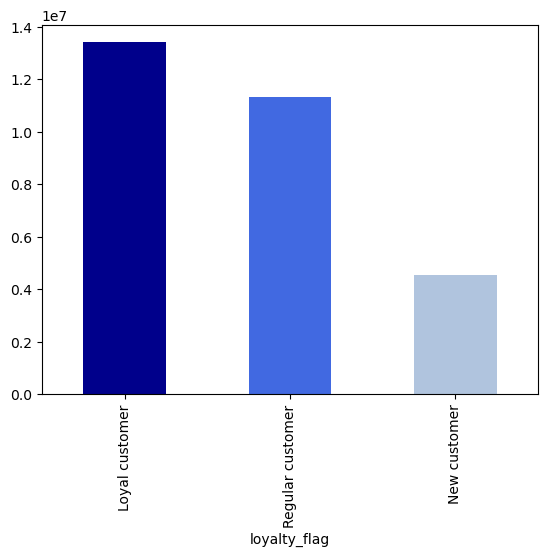

In [38]:
# by loyalty_flag
instacart_for_cfo['loyalty_flag'].value_counts().plot.bar(color = ['darkblue', 'royalblue', 'lightsteelblue', 'skyblue'])

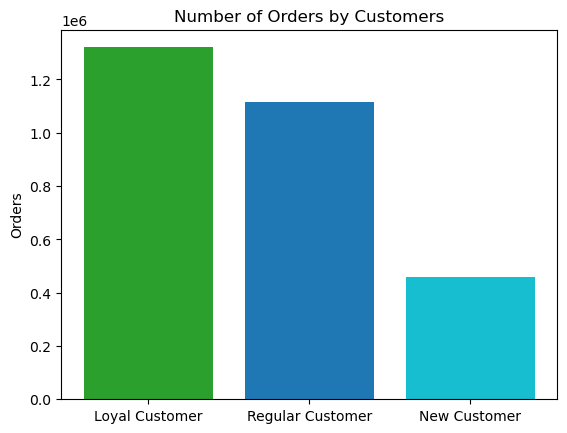

In [85]:
# create bar chart for instacart_ccust_loyal
fig, ax = plt.subplots()

loyalty_flag = ['Loyal Customer', 'Regular Customer','New Customer']
counts = [ 1320751, 1114462,460296]
bar_labels = ['green', 'blue', 'cyan']
bar_colors = ['tab:green', 'tab:blue', 'tab:cyan']

ax.bar(loyalty_flag, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Orders')
ax.set_title('Number of Orders by Customers')

plt.show()

In [40]:
# Export chart
ax.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_loyal.png'))

## Scatterpot

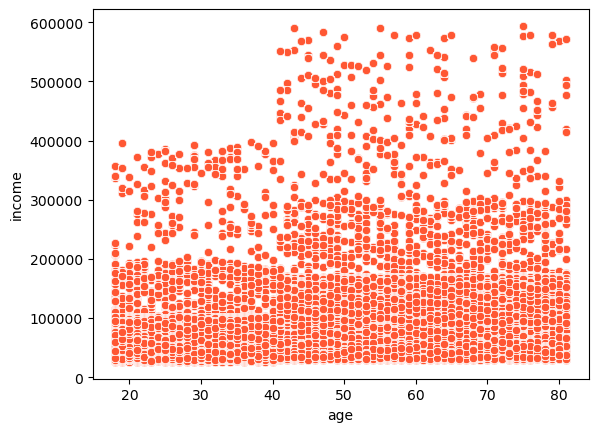

In [41]:
# Between age and income
scatterplot_age = sns.scatterplot(x = 'age', y = 'income', data = instacart_for_cfo, color = '#ff5733')

plt.show()

In [42]:
scatterplot_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

In [43]:
# Find average income per hour using groupby 

In [44]:
instacart_for_cfo.groupby('order_hour_of_day')

In [45]:
income_mean = instacart_for_cfo.groupby('order_hour_of_day').agg({'income': 'mean'}).reset_index()

In [46]:
income_mean

,order_hour_of_day,income
0,0,99093.271156
1,1,99748.929131
2,2,100063.479206
3,3,100029.806832
4,4,101038.046245
5,5,101399.748926
6,6,100391.499915
7,7,100895.707694
8,8,99861.572319
9,9,98509.677252


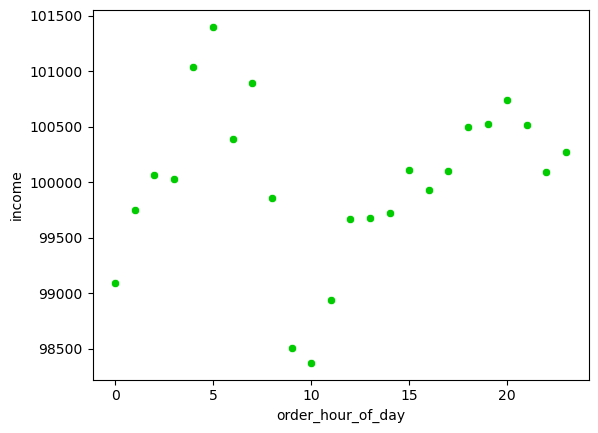

In [47]:
# Between income and order_hour_of_day
scatterplot_income_mean = sns.scatterplot(x = 'order_hour_of_day', y = 'income', data = income_mean, color = '#00cc00')

In [48]:
# Find average income by age group using groupby 

In [49]:
instacart_for_cfo.groupby('age')

In [50]:
# Relationship between age and income
age_group_income = instacart_for_cfo.groupby('age_group').agg({'income': 'mean'}).reset_index().round(0)

In [51]:
age_group_income

,age_group,income
0,Adult,99420.0
1,Senior,115974.0
2,Young Adult,70833.0
3,Youth,70629.0


In [52]:
# Relationship between age and income
age_income = instacart_for_cfo.groupby('age').agg({'income': 'mean'}).reset_index().round(2)

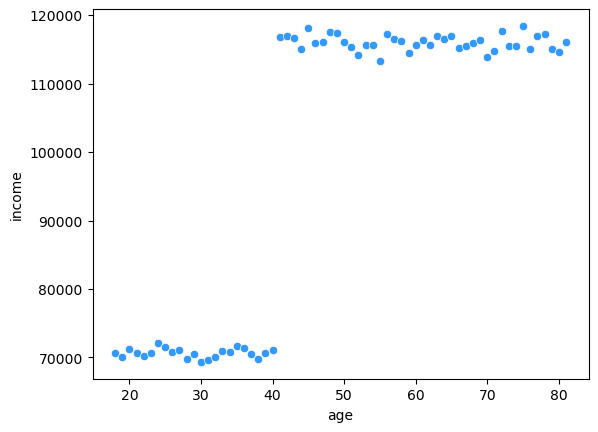

In [53]:
# Between age_group and income
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = age_income, color = '#3399ff')

In [54]:
instacart_for_cfo['age_group'].value_counts()

age_group
Adult          13778563
Senior          9998947
Young Adult     3650672
Youth           1842756
Name: count, dtype: int64

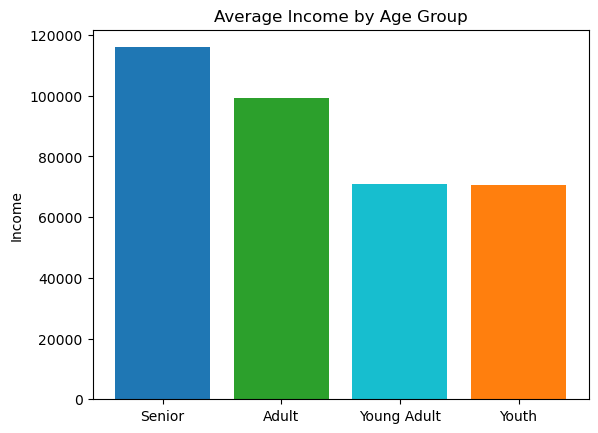

In [55]:
# create bar chart for income and age_group

fig, ax = plt.subplots()

age_group = ['Senior', 'Adult', 'Young Adult', 'Youth']
counts = [115974, 99420, 70833, 70629]
bar_labels = ['blue', 'green', 'cyan', 'orange']
bar_colors = ['tab:blue', 'tab:green', 'tab:cyan', 'tab:orange']

ax.bar(age_group, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Income')
ax.set_title('Average Income by Age Group')

plt.show()

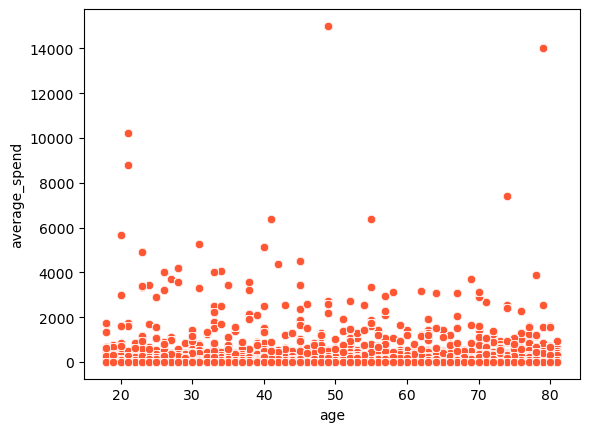

In [56]:
# Between age and average spend
scatterplot_age_average_spend = sns.scatterplot(x = 'age', y = 'average_spend', data = instacart_for_cfo, color = '#ff5733')

In [57]:
plt.show()

In [58]:
scatterplot_age_average_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_average_spend.png'))

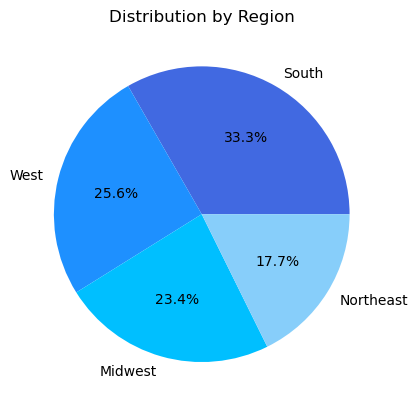

In [59]:
# Count the occurrences of each region
region_counts = instacart_for_cfo['region'].value_counts()

# Plotting as a pie chart
region = region_counts.plot.pie(colors=['royalblue', 'dodgerblue', 'deepskyblue', 'lightskyblue'], autopct='%1.1f%%')
plt.ylabel('')  # Remove the ylabel for cleaner presentation
plt.title('Distribution by Region')
plt.show()

In [60]:
region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_region_counts.png'))

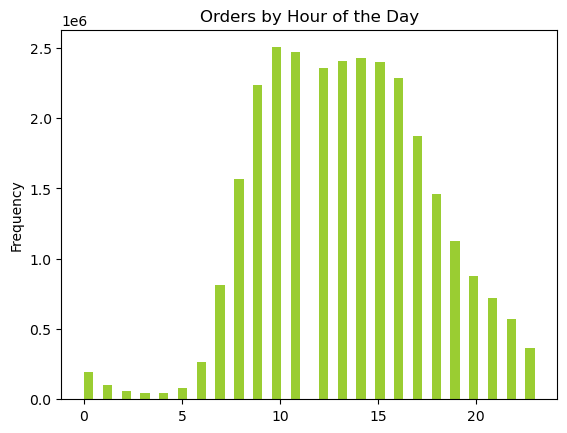

In [61]:
# Histogram of the “order_hour_of_day” column
hist_orders = instacart_for_cfo['order_hour_of_day'].plot.hist(bins=48, color='yellowgreen')
plt.title('Orders by Hour of the Day')
plt.show()

In [62]:
hist_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_by_hour.png'))

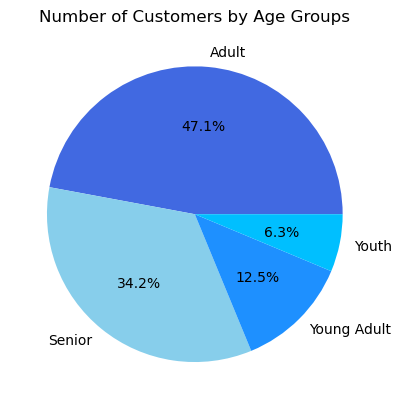

In [63]:
# Count the occurrences of each region
age_counts = instacart_for_cfo['age_group'].value_counts()

# Plotting as a pie chart
pie_age = age_counts.plot.pie(colors=['royalblue', 'skyblue', 'dodgerblue', 'deepskyblue'], autopct='%1.1f%%')
plt.ylabel('')  # Remove the ylabel for cleaner presentation
plt.title('Number of Customers by Age Groups')
plt.show()

In [64]:
pie_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_age_group.png'))

In [65]:
instacart_for_cfo.groupby('loyalty_flag').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                         mean min max
loyalty_flag                         
Loyal customer      28.676995   1  99
New customer         4.268308   1  10
Regular customer    10.378283   1  30

In [66]:
instacart_for_cfo.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spend_flag', 'order_frequency', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'region', 'activity_flag', 'age_group', 'income_group'],
      dtype='object')

In [67]:
instacart_for_cfo.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
loyalty_flag                         
Loyal customer    7.780787  1.0  25.0
New customer      7.802590  1.0  25.0
Regular customer  7.799920  1.0  25.0

In [68]:
instacart_for_cfo.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_spend,order_frequency,age,n_dependants,income
count,2.927094e+07,2.927094e+07,2.927094e+07,2.927094e+07,2.927094e+07,2.769951e+07,2.927094e+07,2.927094e+07,2.927094e+07,2.927094e+07,2.927094e+07,2.926639e+07,2.927094e+07,2.927094e+07,2.927094e+07,2.927094e+07,2.927094e+07,2.927094e+07
mean,1.710395e+06,1.029643e+05,1.781349e+01,2.740726e+00,1.341122e+01,1.081746e+01,2.560204e+04,8.365915e+00,6.059778e-01,7.119085e+01,9.920383e+00,7.791568e+00,3.438105e+01,1.186815e+01,9.965197e+00,4.947596e+01,1.501600e+00,9.969692e+04
std,9.873471e+05,5.942053e+04,1.761427e+01,2.089148e+00,4.246883e+00,8.580134e+00,1.408102e+04,7.136818e+00,4.886396e-01,3.822195e+01,6.282706e+00,4.241156e+00,2.486265e+01,7.967068e+01,6.666975e+00,1.847853e+01,1.118496e+00,4.314845e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.555250e+05,5.155200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.355400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.393949e+00,6.000000e+00,3.400000e+01,1.000000e+00,6.736700e+04
50%,1.710655e+06,1.025560e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.530500e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.825764e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676300e+04
75%,2.565038e+06,1.543750e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.249451e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.281390e+05
max,3.421082e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [69]:
instacart_for_cfo.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.793724  1.0  25.0
Northeast  7.781959  1.0  25.0
South      7.795808  1.0  25.0
West       7.790718  1.0  25.0

In [70]:
instacart_for_cfo.groupby('department_id').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
department_id                      
1               7.734028  1.0  15.0
2               6.994974  1.1  15.0
3               7.857335  1.0  15.0
4               7.980677  1.0  15.0
5               8.156098  1.0  15.0
6               7.678268  1.0  15.0
7               7.683904  1.0  15.0
8               7.881895  1.0  15.0
9               7.353288  1.0  15.0
10              8.355577  1.4  14.1
11              7.994376  1.0  15.0
12             16.302297  8.0  25.0
13              8.011818  1.0  20.0
14              8.031662  1.0  14.9
15              7.547812  1.0  15.0
16              8.338888  1.0  15.0
17              7.377547  1.0  15.0
18              7.639114  1.0  15.0
19              4.276074  1.6   7.0
20              7.784488  1.0  15.0
21              8.656371  1.0  15.0

In [71]:
# Grouping and aggregating the data
grouped_data = instacart_for_cfo.groupby('income_group').agg({'age': ['mean', 'min', 'max']})

In [72]:
# group and transform to 2d to create horizontal bar chart
loyal = instacart_for_cfo.groupby(['loyalty_flag', 'department_id']).size().unstack()

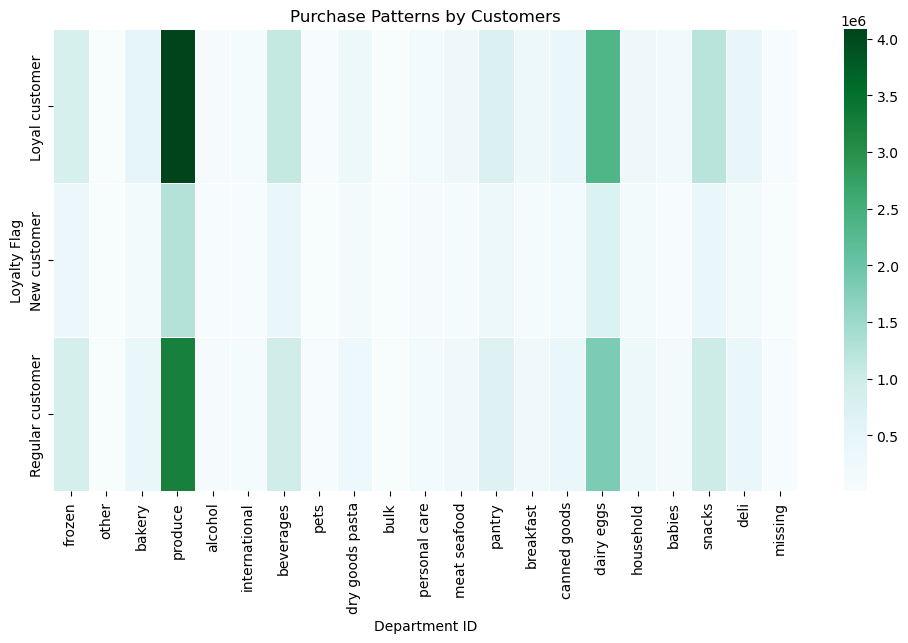

In [73]:
# Create the figure
patterns = plt.figure(figsize=(12, 6))

# Create heatmap with 'BuGu' colormap
sns.heatmap(loyal, cmap='BuGn', linewidth=0.5)

# Get the current axes
ax = plt.gca()

# Define new labels for x-axis
new_x_labels = ['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international', 'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care', 'meat seafood', 'pantry', 'breakfast', 'canned goods', 'dairy eggs', 'household', 'babies', 'snacks' , 'deli', 'missing']

# Set new x-axis labels and rotate them vertically
ax.set_xticklabels(new_x_labels, rotation=90)

# Set title
plt.title('Purchase Patterns by Customers')

# Set labels
plt.xlabel('Department ID')
plt.ylabel('Loyalty Flag')

# Show the plot
plt.show()

In [74]:
# Export
patterns.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_loyalty.png'))

Text(0.5, 1.0, 'Orders by Prices')

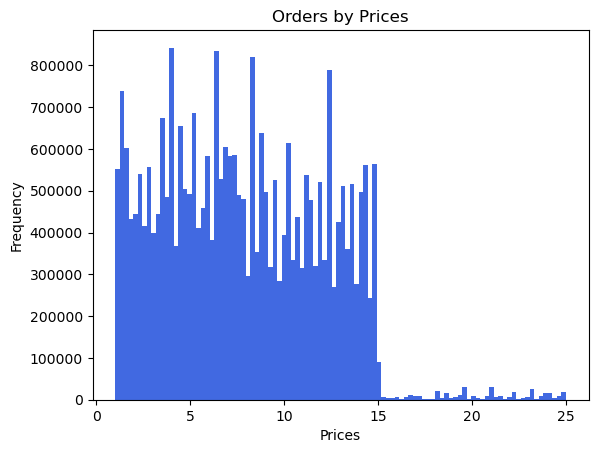

In [75]:
# Create a histogram of the “prices” column:
hist_prices = instacart_for_cfo['prices'].plot.hist(bins = 100, color = 'royalblue')
plt.ylabel('Frequency')
plt.xlabel('Prices')
plt.title('Orders by Prices')

In [76]:
# Export histogram
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [77]:
price_description = instacart_for_cfo['prices'].describe()

In [78]:
price_description

count    2.926639e+07
mean     7.791568e+00
std      4.241156e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [79]:
# Calculate the median of the 'price' column
median_price = instacart_for_cfo['prices'].median()

print("Median Price:", median_price)

Median Price: 7.4


In [86]:
instacart_for_cfo.shape

(29270938, 34)

In [87]:
instacart_for_cfo.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spend_flag', 'order_frequency', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'region', 'activity_flag', 'age_group', 'income_group'],
      dtype='object')

### Export dataframe

In [88]:
# Export instacart_for_cfo as “insta_cfo_charts.pkl” in your “Prepared Data” folder

instacart_for_cfo.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'insta_cfo_charts.pkl'))